**California House Price Prediction <br>
--Shreenav Dhakal
27 March 2022**

# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [5]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# **Loading the dataset**

In [6]:
housing = pd.read_csv(r"D:/python/housing.csv")

# **Exploring the dataset**

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Target Variable: median_house_value <br>
already scaled variables: median_income (maybe represented as 1 = 10000$)


# **Visualizing the dataset**

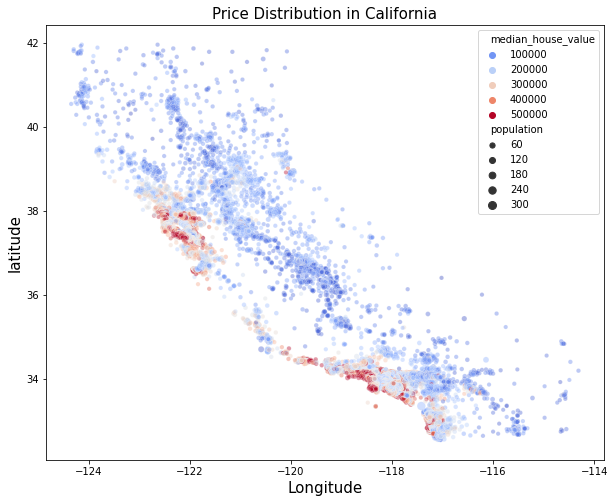

In [11]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm',size=housing['population']/100,alpha=0.4)
plt.title('Price Distribution in California',fontsize=15)
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('latitude',fontsize=15)
plt.show()

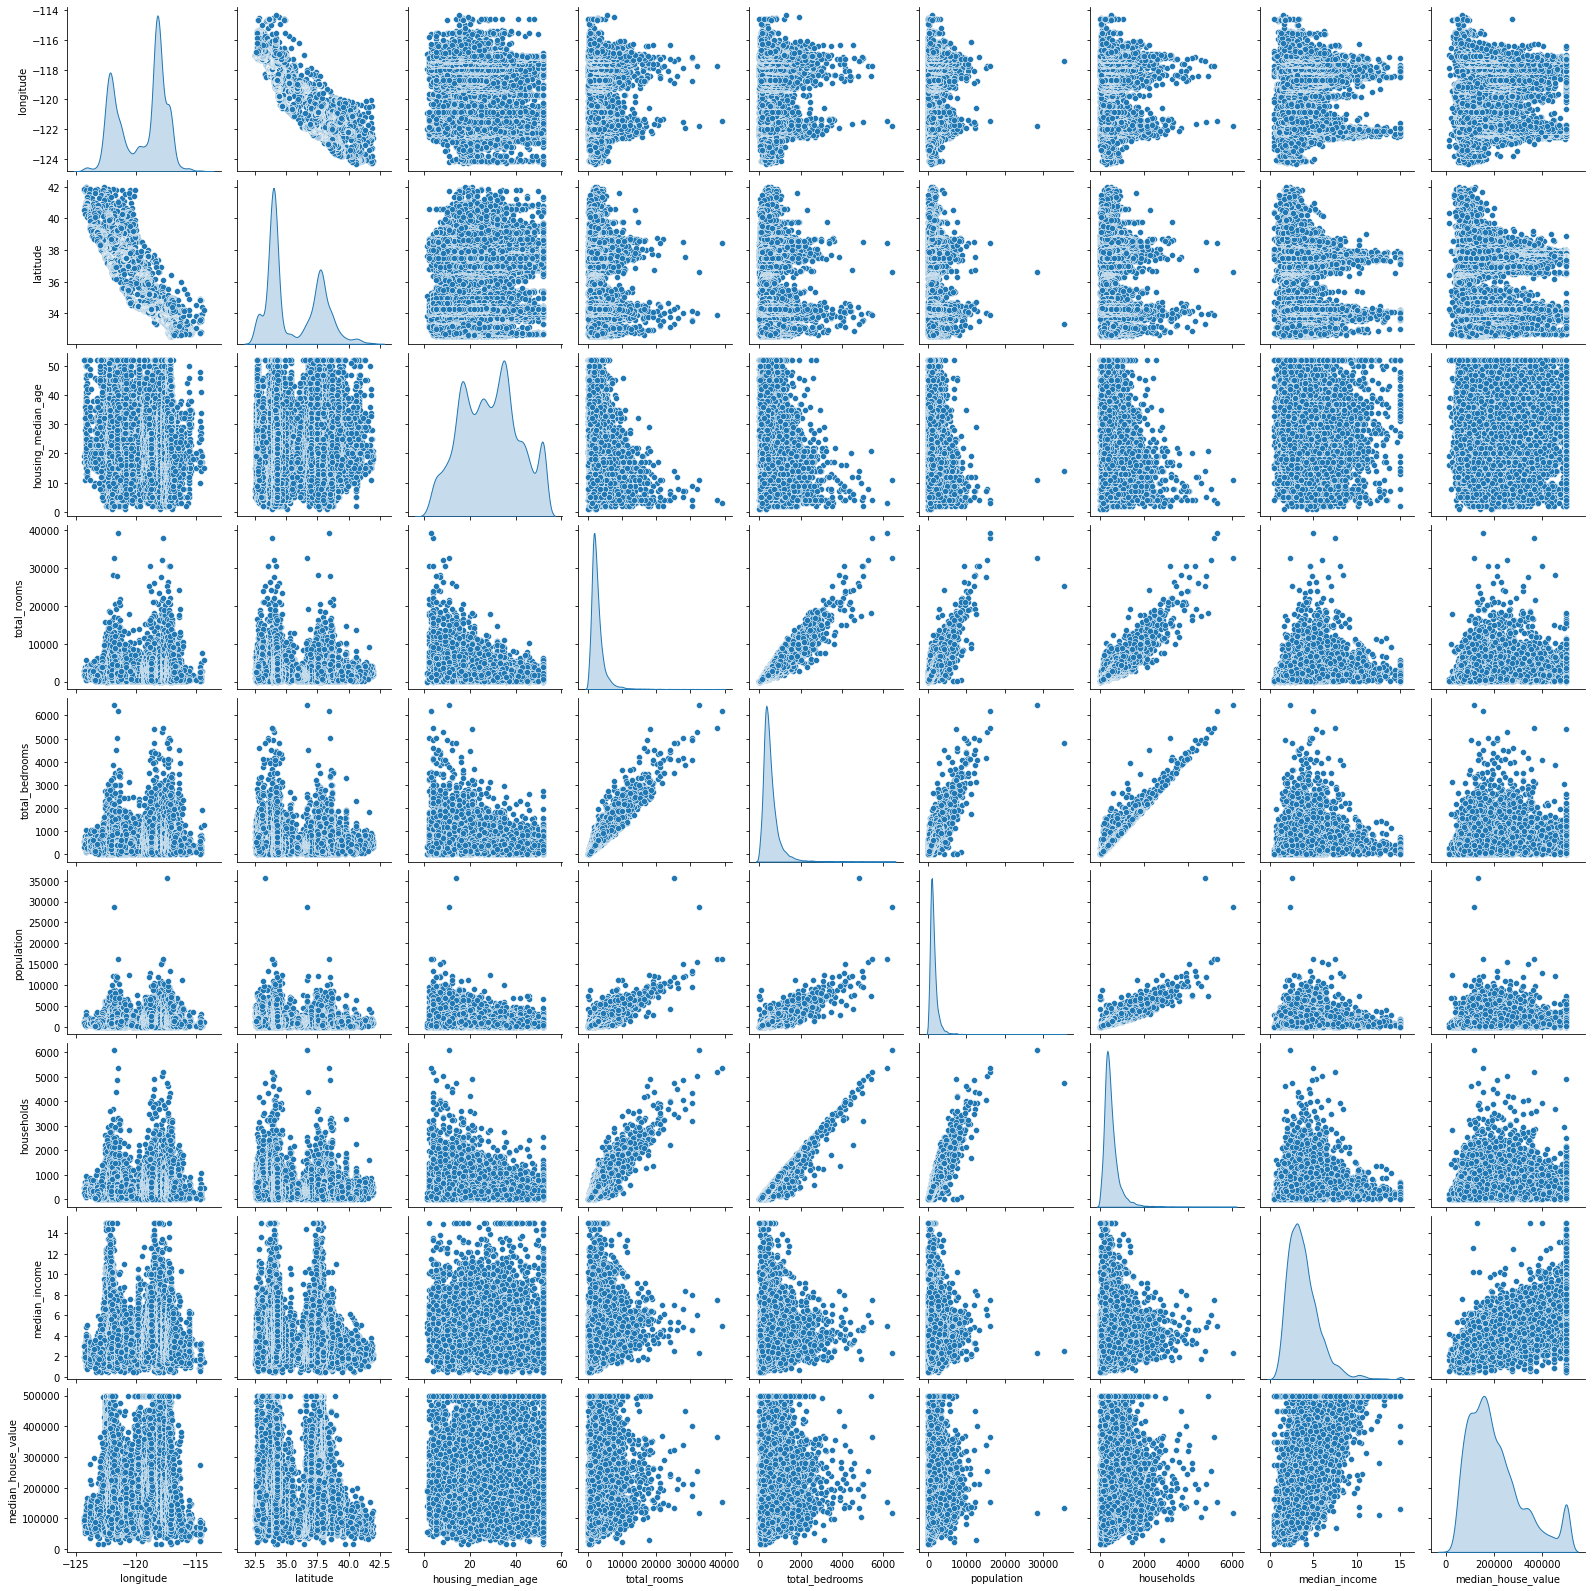

In [12]:
sns.pairplot(housing,diag_kind='kde',kind='scatter')
plt.show()

In [13]:
## finding the correlations
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [14]:
housing.corr()['median_house_value'].drop('median_house_value').sort_values(ascending=False)

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

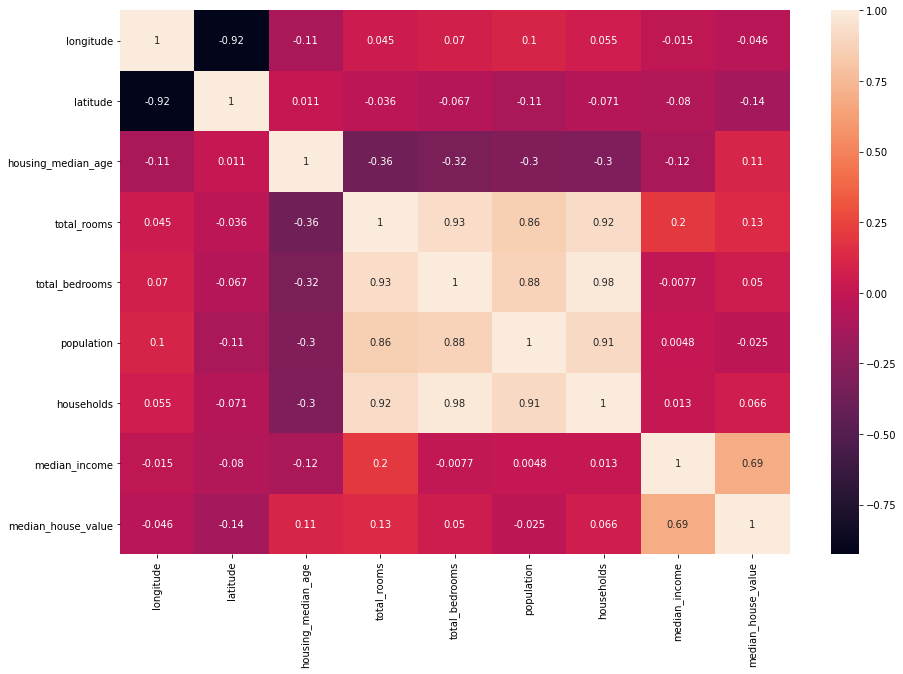

In [15]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(housing.corr(),annot=True)
plt.show()

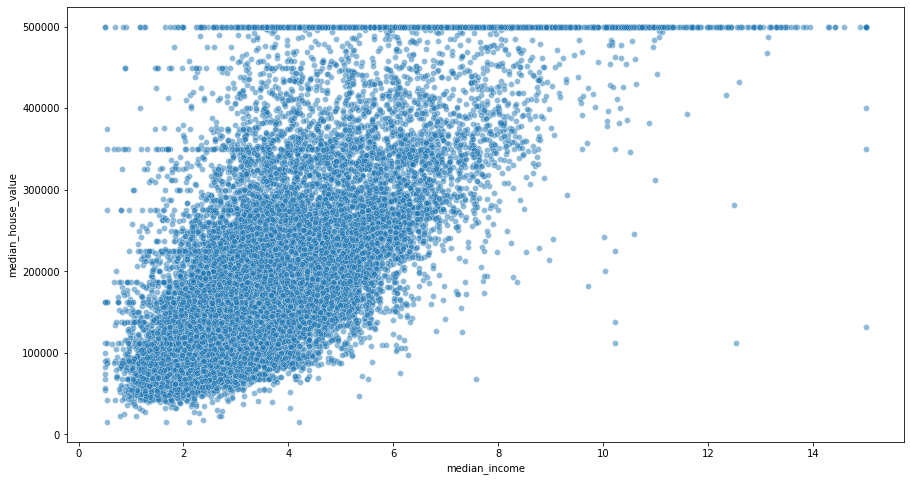

In [16]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(data=housing, x='median_income', y='median_house_value',alpha=0.5)
plt.show()

In [17]:
housing['median_house_value'].max()

500001.0

In [18]:
housing.loc[housing['median_house_value']==500000].shape

(27, 10)

In [19]:
housing.loc[housing['median_house_value']>=500001.0].shape

(965, 10)

**The house prices greater than 500000 are all scaled into 500001.0 which will create a problem while creating a model. So we will create a model that can predict the house prices upto 500000**

In [20]:
housing = housing.loc[housing['median_house_value']<500001.0]

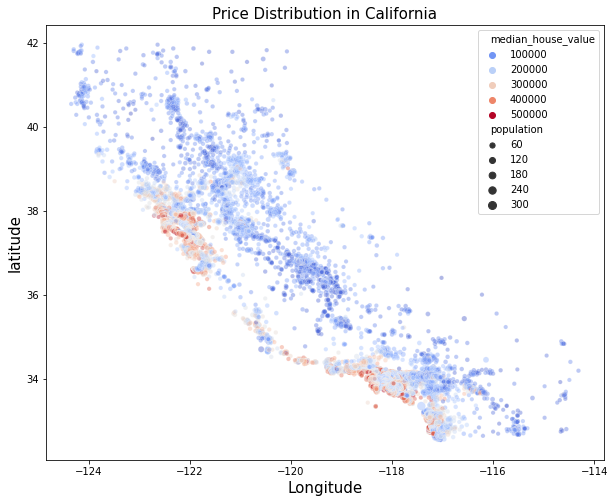

In [21]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=housing, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm',size=housing['population']/100,alpha=0.4)
plt.title('Price Distribution in California',fontsize=15)
plt.xlabel('Longitude',fontsize=15)
plt.ylabel('latitude',fontsize=15)
plt.show()

# **Splitting the dataset into train and test**

In [22]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [23]:
housing['income_cat'].value_counts()

3    7103
2    6552
4    3502
5    1704
1     814
Name: income_cat, dtype: int64

In [24]:
housing.index = np.arange(0,19675)

In [25]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing,housing['income_cat']):
  train_data = housing.loc[train_idx]
  test_data = housing.loc[test_idx]

In [26]:
for a in (housing,train_data,test_data):
  a.drop(columns=['income_cat'],inplace=True)

In [27]:
y_train = train_data[['median_house_value']]
X_train = train_data.drop(columns=['median_house_value'])

y_test = test_data[['median_house_value']]
X_test = test_data.drop(columns=['median_house_value'])

# **Data preparation**

In [28]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [29]:
class AttributeAdder(TransformerMixin, BaseEstimator):
  def __init__(self,add_bedroom_per_room=True):
    self.add_bedroom_per_room = add_bedroom_per_room
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X,y=None):
    popn_per_household = X[:,5] / X[:,6]
    room_per_household = X[:,3] / X[:,6]
    if self.add_bedroom_per_room:
      bedroom_per_room = X[:,4] / X[:,3]
      return np.c_[X,popn_per_household,room_per_household,bedroom_per_room]
    else:
      return np.c_[X,popn_per_household,room_per_household]

In [30]:
num_pipeline = Pipeline([
                         ("imputer",SimpleImputer(strategy='median')),
                         ("adder",AttributeAdder(True)),
                         ("scaler",StandardScaler())
])

In [31]:
X_train.columns[:-1]

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [32]:
num_attribs = list(X_train.columns[:-1])
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline,num_attribs),
                                   ("encoder",OneHotEncoder(),cat_attribs)
])

In [33]:
X_train_prepared = full_pipeline.fit_transform(X_train)

# **Model building and testing**

## **1. Trying all Regression algorithm**

In [34]:
y_train = y_train.values

In [35]:
all_models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), GradientBoostingRegressor(),
              AdaBoostRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
         'K Neigbor Regressor','Gradient Boosting','ADA Boosting Regressor']

In [36]:
Model = []
RMSE = []
R2 = []

def input_scores(name,model,x,y):
  Model.append(name)
  RMSE.append(np.sqrt(-1 * cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10).mean()))
  R2.append(cross_val_score(model,x,y,scoring='r2',cv=10).mean())


In [37]:
for name, model in zip(names,all_models):
  input_scores(name,model,X_train_prepared, y_train)

In [38]:
Model

['Linear Regression',
 'Ridge Regression',
 'Lasso Regression',
 'Elastic Net Regression',
 'Decision Tree Regressor',
 'Random Forest Regressor',
 'K Neigbor Regressor',
 'Gradient Boosting',
 'ADA Boosting Regressor']

In [39]:
RMSE

[61199.25356216318,
 61195.9740176221,
 61199.10907219672,
 69342.85669410611,
 65080.06093904587,
 45770.644916993726,
 55920.22274361194,
 48912.93187815943,
 69957.89174434757]

In [40]:
R2

[0.6104351489834946,
 0.6104831329312667,
 0.6104383597637165,
 0.4999590103136108,
 0.5654976264091178,
 0.7812830078939901,
 0.6744960046389483,
 0.7511051225085594,
 0.4469811951307312]

In [41]:
df = pd.DataFrame({'Model':Model, 'RMSE':RMSE, 'R2':R2})
df.sort_values(by=['R2'],ascending=False,inplace=True)

[]

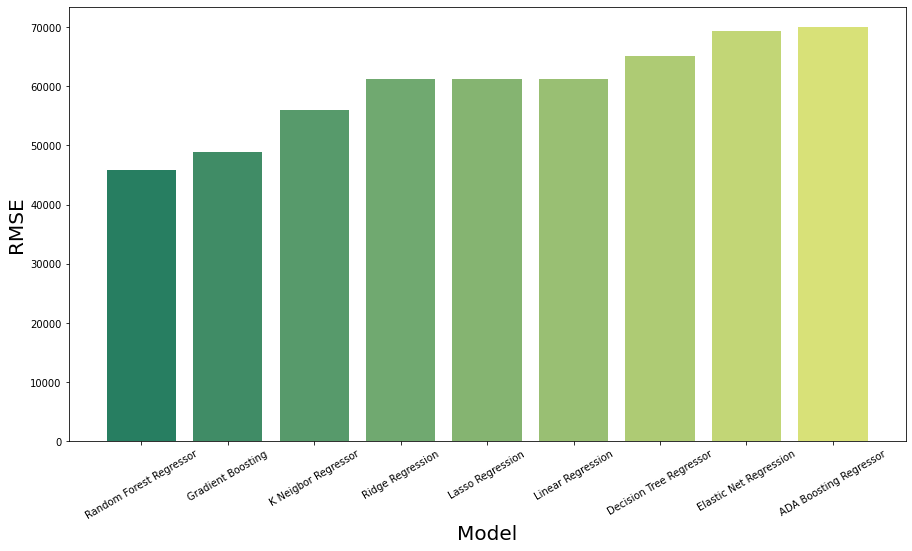

In [42]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Model',y='RMSE', palette='summer')
loc,labels = plt.xticks()
plt.setp(labels,rotation=30)
plt.xlabel('Model',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
plt.plot()

[]

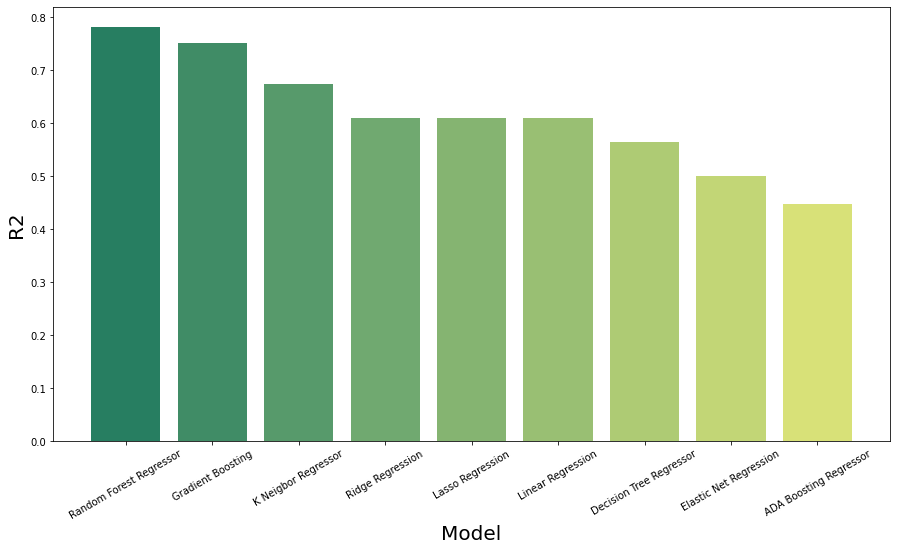

In [43]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=df, x='Model',y='R2', palette='summer')
loc,labels = plt.xticks()
plt.setp(labels,rotation=30)
plt.xlabel('Model',fontsize=20)
plt.ylabel('R2',fontsize=20)
plt.plot()

**Random Forest Regressor**  seems to be the suitable model<br>
Now we tune the model to find the best hyper-Parameters

## **Using Randomized Search CV**

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]
bootstrap = [True, False]
forest = RandomForestRegressor()
parameters = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}
random = RandomizedSearchCV(forest, parameters, cv=10, n_jobs=-1, n_iter=20, verbose=2,scoring='neg_mean_squared_error').fit(X_train_prepared, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


In [50]:
random.best_params_

{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 23,
 'bootstrap': False}

Let's find out the best estimator

In [51]:
random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=23, max_features='sqrt',
                      min_samples_split=10, n_estimators=110)

In [59]:
np.sqrt(-1 * random.best_score_)

44853.88718840359

### Using Grid Search CV

In [54]:
forest = RandomForestRegressor()
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid = GridSearchCV(forest,param_grid,cv=10,scoring='neg_mean_squared_error').fit(X_train_prepared,y_train)

In [55]:
grid.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}

In [57]:
np.sqrt(-1 * grid.best_score_)

45067.9676678366

## Finding the best predictor

In [68]:
random_predictor = random.best_estimator_
grid_predictor = grid.best_estimator_

In [69]:
random_predicted = random_predictor.predict(X_train_prepared)
grid_predicted = grid_predictor.predict(X_train_prepared)

In [70]:
print(f"RMSE of Random CV predictor for train values: {np.sqrt(mean_squared_error(y_train, random_predicted))}")
print(f"RMSE of Grid CV predictor for train values: {np.sqrt(mean_squared_error(y_train, grid_predicted))}")

RMSE of Random CV predictor for train values: 15862.30313657804
RMSE of Grid CV predictor for train values: 0.0


In [71]:
X_test_prepared = full_pipeline.fit_transform(X_test)

In [72]:
random_predicted = random_predictor.predict(X_test_prepared)
grid_predicted = grid_predictor.predict(X_test_prepared)

In [73]:
print(f"RMSE of Random CV predictor for test values: {np.sqrt(mean_squared_error(y_test, random_predicted))}")
print(f"RMSE of Grid CV predictor for test values: {np.sqrt(mean_squared_error(y_test, grid_predicted))}")

RMSE of Random CV predictor for test values: 50792.879426015636
RMSE of Grid CV predictor for test values: 54438.683377948786


# Feature Importance

In [81]:
importances = random.best_estimator_.feature_importances_

In [83]:
num_attribs = list(housing.columns)
del num_attribs[-2]

In [85]:
del num_attribs[-1]

In [86]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes =  num_attribs + extra_attribs + cat_one_hot_attribs

In [88]:
feature_importance = sorted(zip(importances, attributes),reverse=True)

In [90]:
df = pd.DataFrame(feature_importance, columns=['Importance', 'feature'])

In [91]:
df

,Importance,feature
0,0.244187,median_income
1,0.177653,INLAND
2,0.103955,longitude
3,0.092620,rooms_per_hhold
4,0.090588,latitude
5,0.085079,bedrooms_per_room
6,0.056179,pop_per_hhold
7,0.035198,housing_median_age
8,0.025505,<1H OCEAN
9,0.020580,total_rooms


Median_income, INLAND and Longitude seems to have more importance than any other feature <br>
in feature a model can be made using only this attributes for faster processing

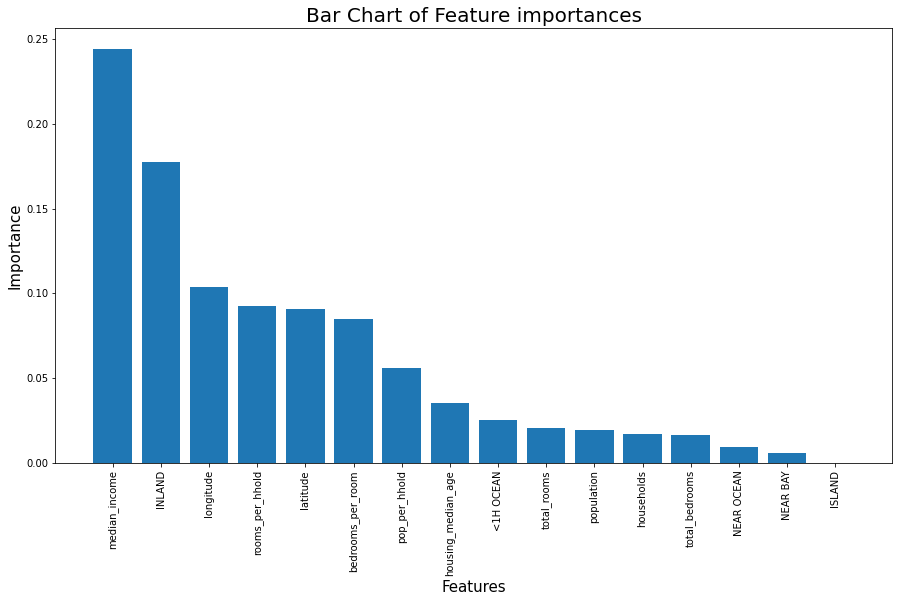

In [98]:
fig = plt.figure(figsize=(15,8))
plt.bar(df['feature'].values, df['Importance'].values)
plt.xticks(range(len(df['feature'])), df['feature'].values,rotation='vertical')
plt.title('Bar Chart of Feature importances',fontsize=20)
plt.xlabel('Features',fontsize=15)
plt.ylabel('Importance',fontsize=15)
plt.show()